In [3636]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [3637]:
df=pd.read_csv('AirPassengers.csv')
df['Month']=pd.to_datetime(df['Month'])
indexedDataset=df.set_index(['Month'])

In [3638]:
from datetime import datetime
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


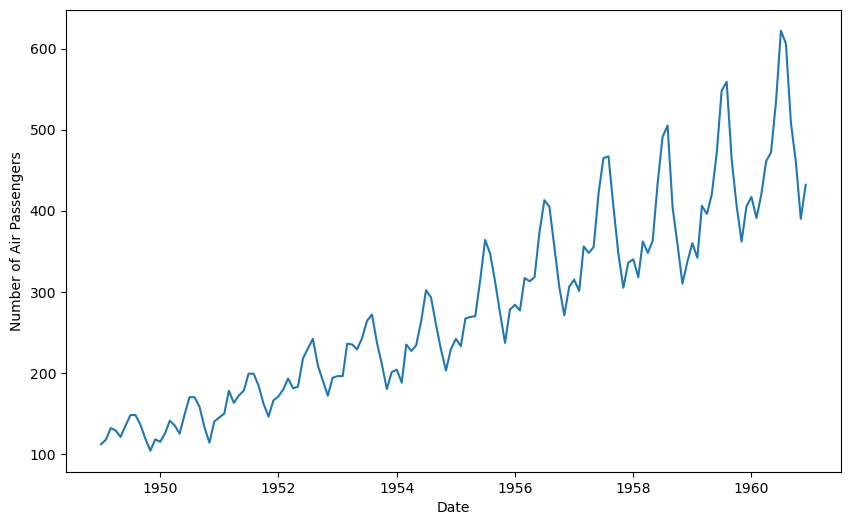

In [3639]:
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(indexedDataset)
plt.show()

In [3640]:
#Determining Stationarity
#Rolling Statistics
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


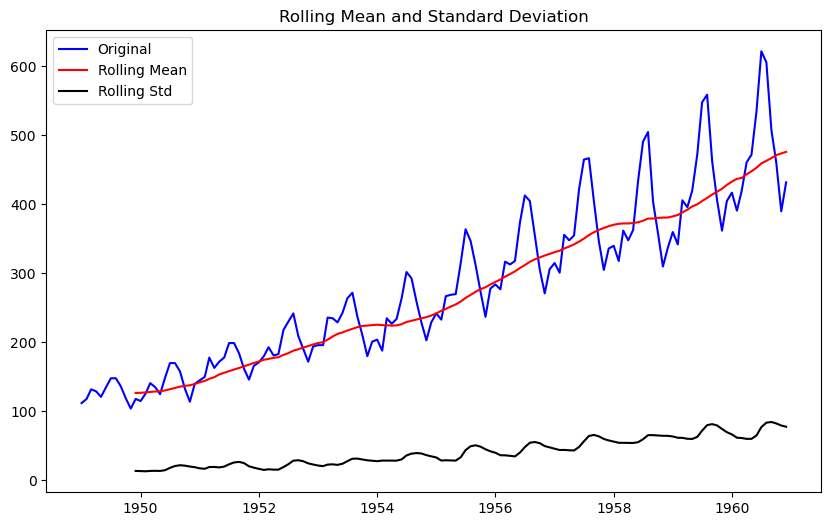

In [3641]:
#plot
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [3642]:
#Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value",'#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)    

Results of Dicky-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


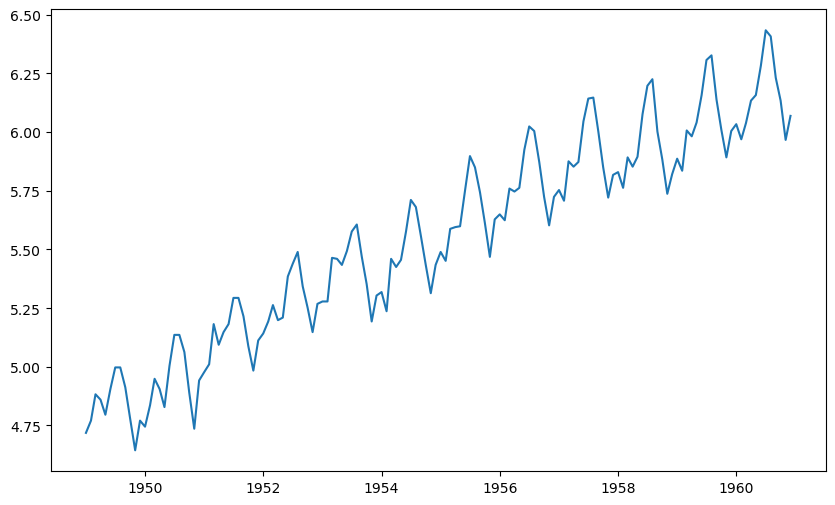

In [3643]:
#Estimating the trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.show()

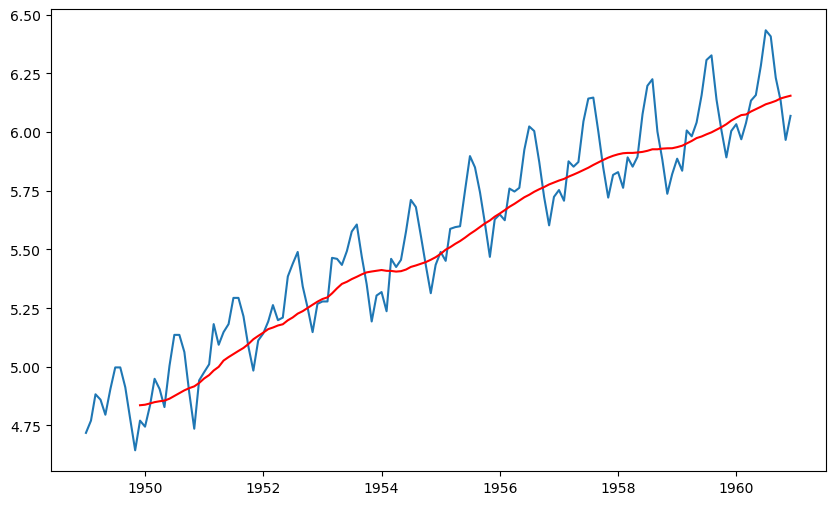

In [3644]:
#moving average
mvavg=indexedDataset_logScale.rolling(window=12).mean()
mvstd=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(mvavg,color='red')
plt.show()

In [3645]:
#Making it stationary option - 1
#dif between mvavg and passengers
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-mvavg
datasetLogScaleMinusMovingAverage.head(12)

#removing nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [3646]:
def test_stationary(timeseries):
    
    mvavg=timeseries.rolling(window=12).mean()
    mvstd=timeseries.rolling(window=12).std()

    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(mvavg,color='red',label='Rolling Mean')
    std=plt.plot(mvstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries['#Passengers'],autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value",'#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)    
        

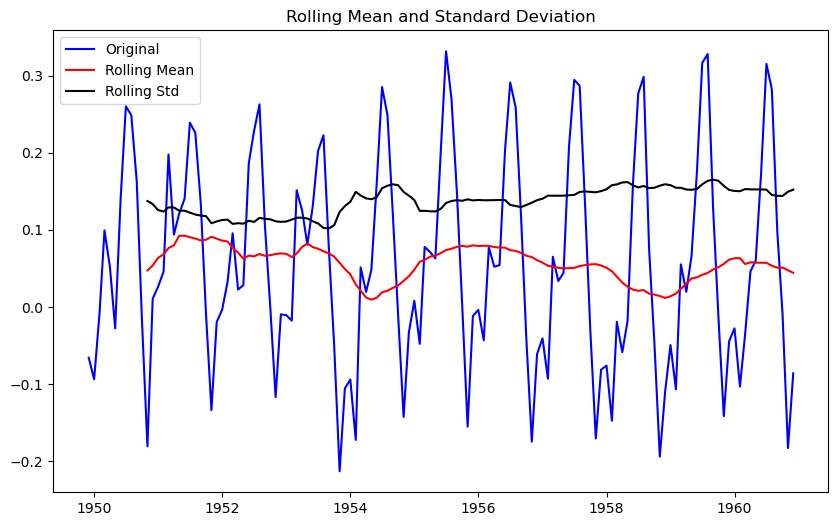

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value(1%)              -3.486535
Critical Value(5%)              -2.886151
Critical Value(10%)             -2.579896
dtype: float64


In [3647]:
test_stationary(datasetLogScaleMinusMovingAverage)

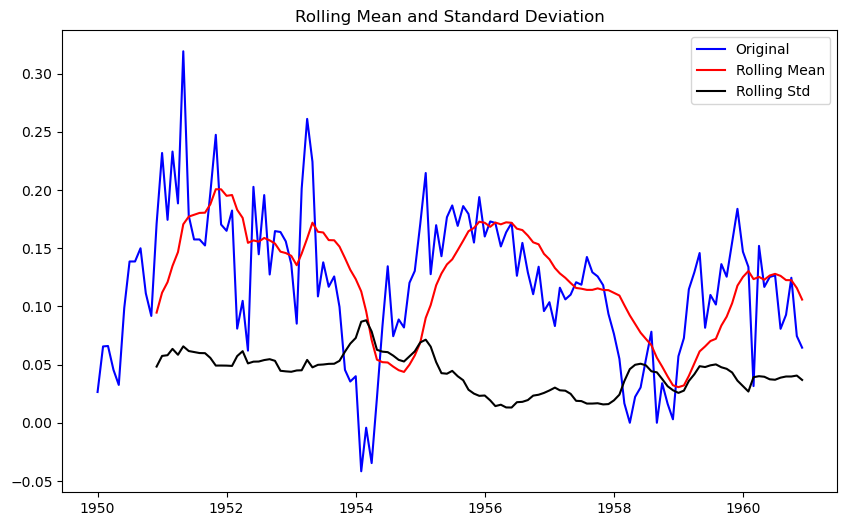

Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value(1%)              -3.486535
Critical Value(5%)              -2.886151
Critical Value(10%)             -2.579896
dtype: float64


In [3648]:
datasetLogDiffSeasonal = indexedDataset_logScale - indexedDataset_logScale.shift(12)
datasetLogDiffSeasonal.dropna(inplace=True)
test_stationary(datasetLogDiffSeasonal)

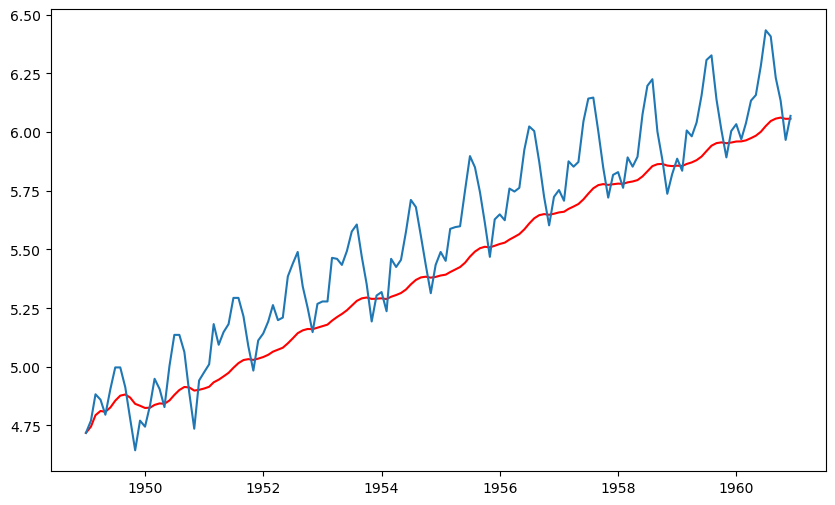

In [3649]:

exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.plot(indexedDataset_logScale)
plt.show()

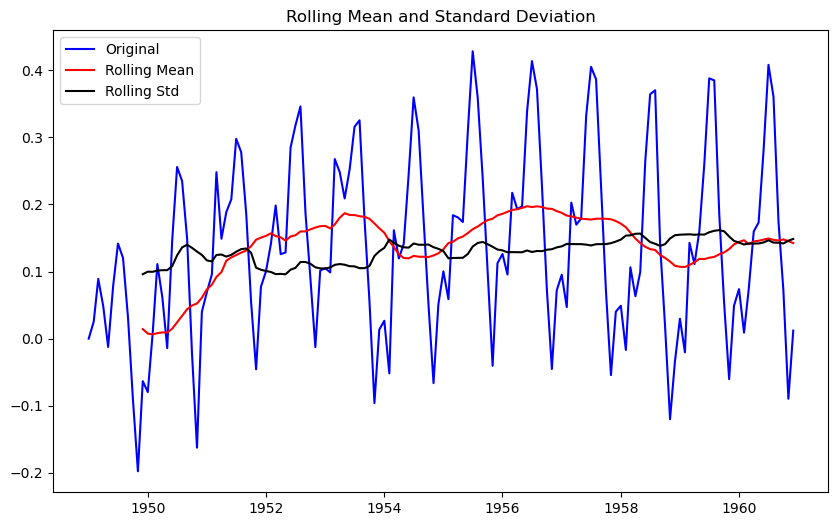

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


In [3650]:
#Making it stationary option - 2
datasetLogScaleMinusExponentialAverageDecay=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusExponentialAverageDecay)


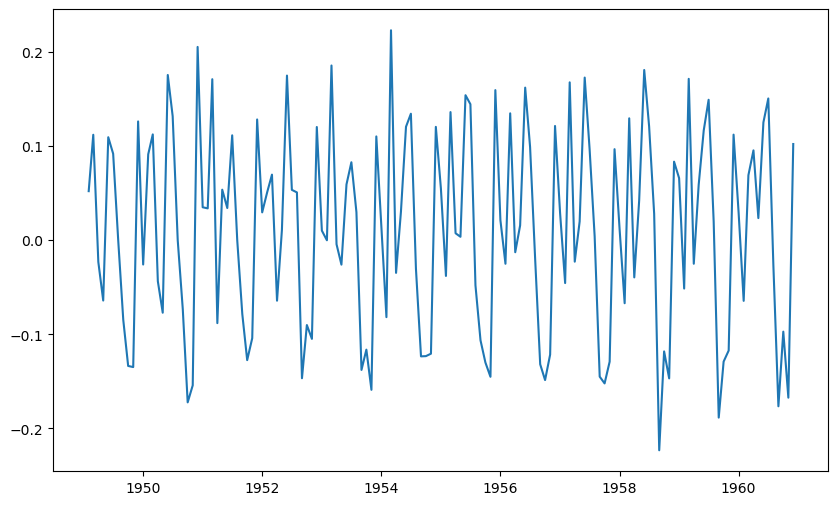

In [3651]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift(1)
plt.plot(datasetLogDiffShifting)
plt.show()

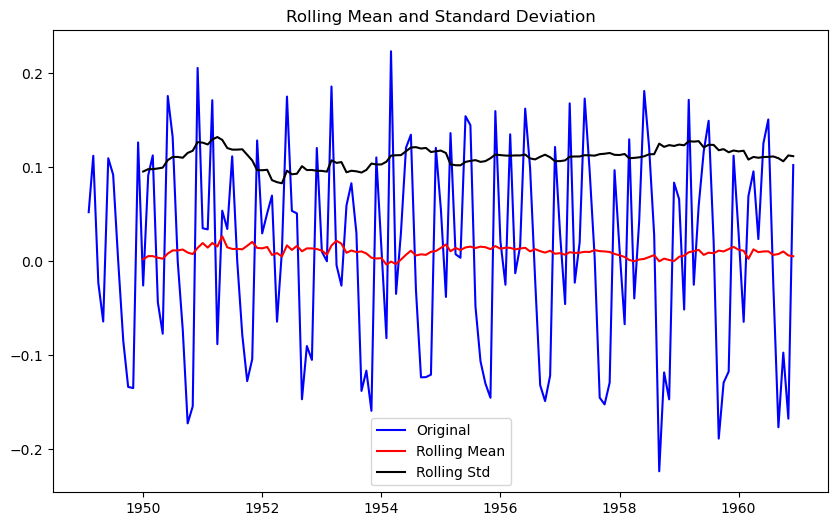

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value(1%)              -3.482501
Critical Value(5%)              -2.884398
Critical Value(10%)             -2.578960
dtype: float64


In [3652]:
datasetLogDiffShifting.dropna(inplace=True)
#removing seasonility

test_stationary(datasetLogDiffShifting)


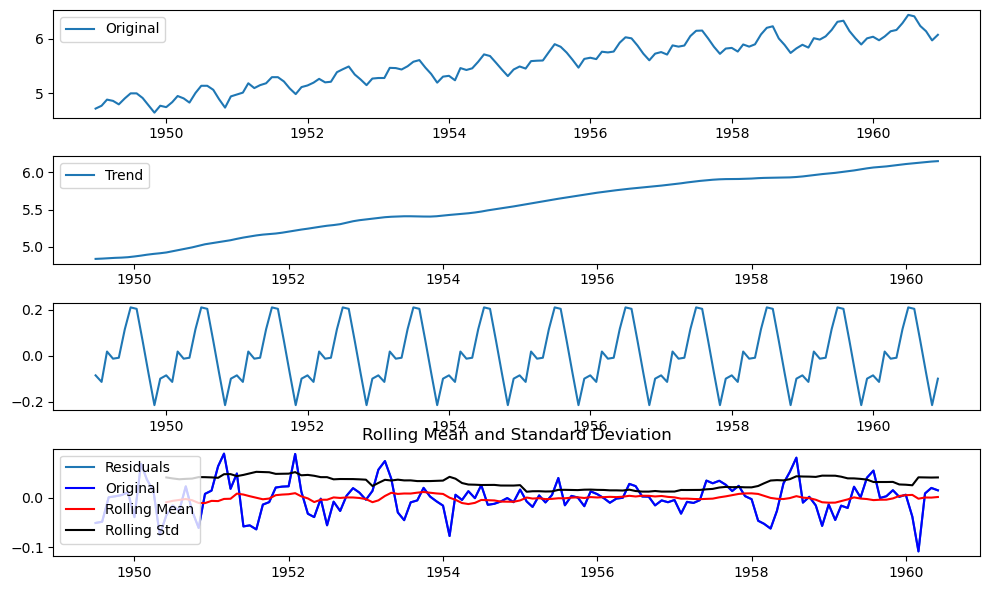

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [3653]:
#Components of Time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
# test_stationary(decomposedLogData)
decomposedLogData=pd.DataFrame(decomposedLogData)
decomposedLogData.rename(columns={'resid': '#Passengers'}, inplace=True)
test_stationary(decomposedLogData)

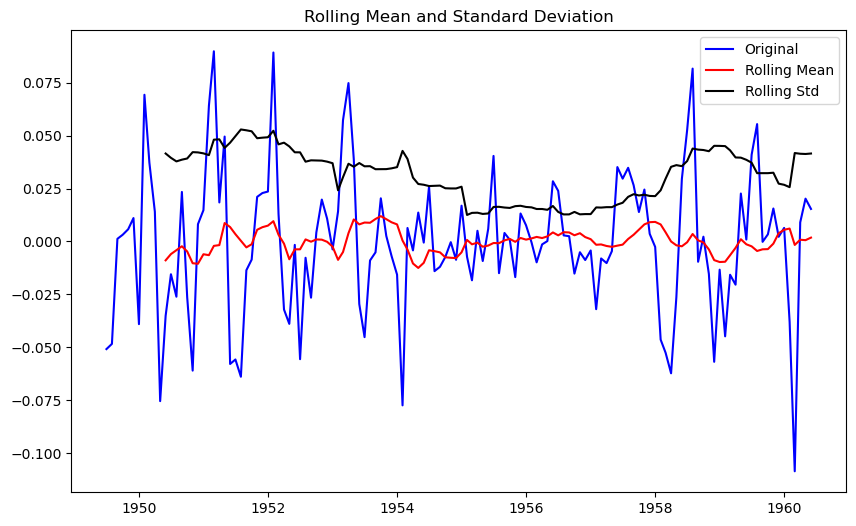

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [3654]:
test_stationary(decomposedLogData)

In [3655]:
indexedDataset#original
diff=indexedDataset.diff()
diff=diff.dropna()
diff.head()



,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


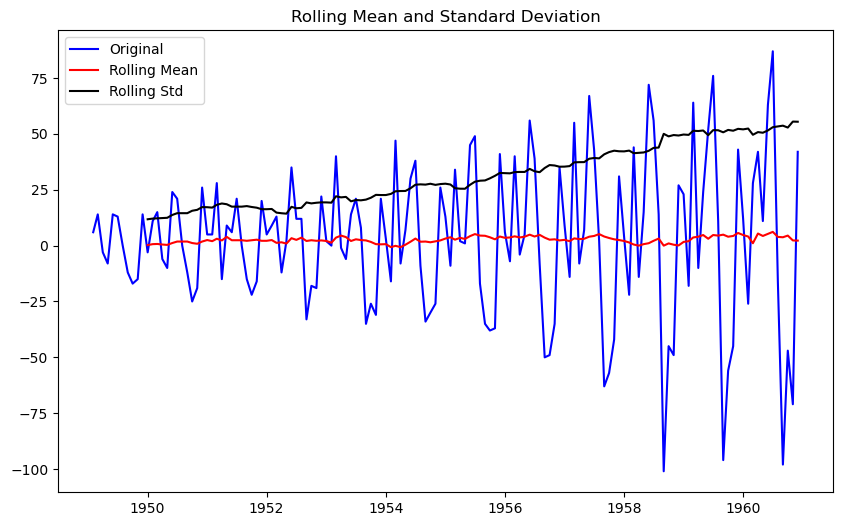

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


In [3656]:
test_stationary(diff)

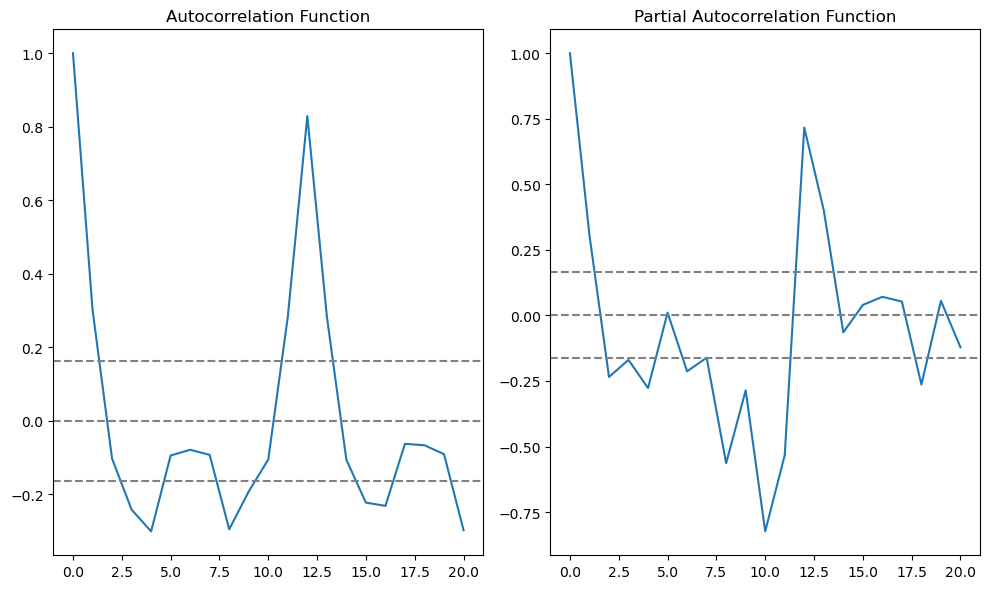

In [3657]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(diff,nlags=20)
lag_pacf=pacf(diff,nlags=20,method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

C:\Users\saleh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


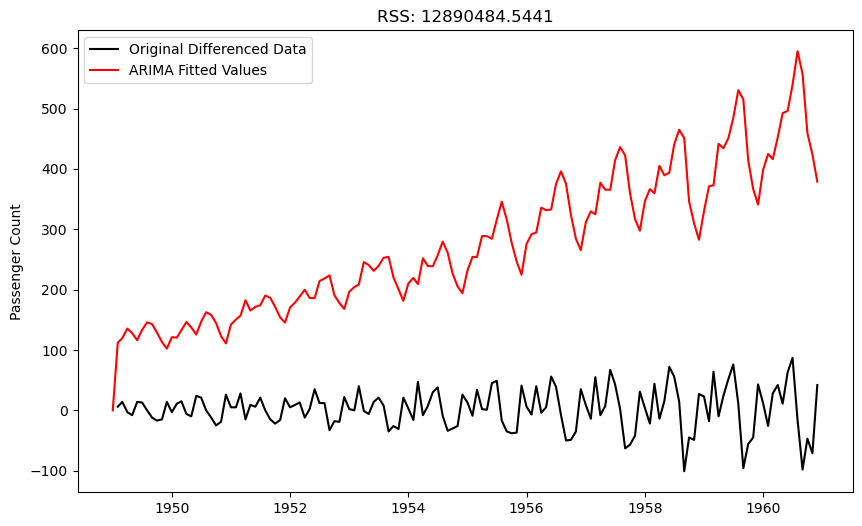

In [3658]:
from statsmodels.tsa.arima.model import ARIMA

indexedDataset = indexedDataset.asfreq('MS')

# Fit ARIMA model
model = ARIMA(indexedDataset["#Passengers"], order=(2, 1, 2))
results_AR = model.fit()

# Rename the columns to 'Month' and '#Passengers'
# Plotting original differenced data and model's fitted values
plt.plot(diff, color="black", label="Original Differenced Data")
plt.plot(results_AR.fittedvalues, color="red", label="ARIMA Fitted Values")
plt.legend()

# fitted_values_df.columns = ['Month', '#Passengers']
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues.iloc[1:]-diff["#Passengers"])**2))
plt.ylabel('Passenger Count')

# Display the plot
plt.show()


C:\Users\saleh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


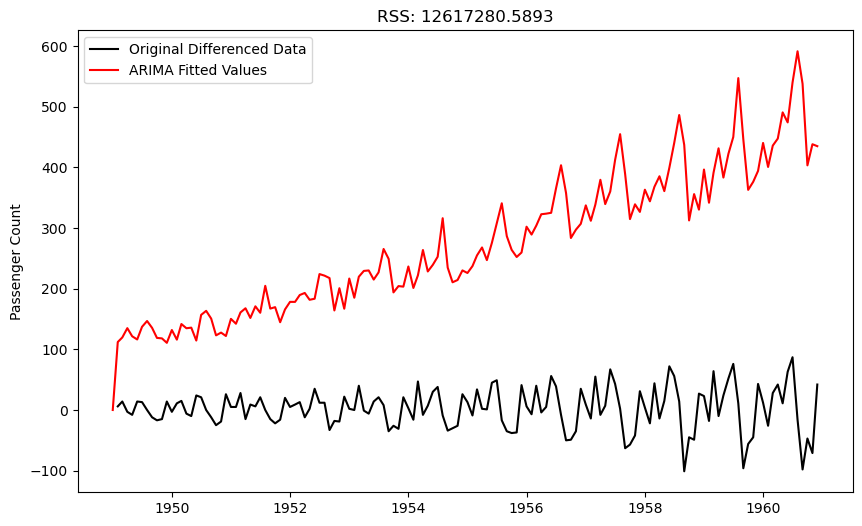

In [3693]:
#MA Model
indexedDataset = indexedDataset.asfreq('MS')

# Fit ARIMA model
model = ARIMA(indexedDataset["#Passengers"], order=(0, 1, 6))
results_AR = model.fit()

# Rename the columns to 'Month' and '#Passengers'
# Plotting original differenced data and model's fitted values
plt.plot(diff, color="black", label="Original Differenced Data")
plt.plot(results_AR.fittedvalues, color="red", label="ARIMA Fitted Values")
plt.legend()

# fitted_values_df.columns = ['Month', '#Passengers']
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues.iloc[1:]-diff["#Passengers"])**2))
plt.ylabel('Passenger Count')
# Display the plot
plt.show()



In [3697]:
predictions_ARIMA_diff=pd.Series(results_AR.fittedvalues.iloc[1:],copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    112.057068
1949-03-01    119.595891
1949-04-01    134.912183
1949-05-01    121.516699
1949-06-01    116.241327
Freq: MS, dtype: float64


In [3699]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    112.057068
1949-03-01    231.652960
1949-04-01    366.565143
1949-05-01    488.081842
1949-06-01    604.323169
Freq: MS, dtype: float64
